# Fed vs. fasted: comparing RSNs in giant Mappers

Let's recreate Figure 4 in Poldrack et al. 2015, Nature Communications, using Mapper!

#### Load data

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [3]:
from utils import *

sessions = load_scrubbed(n_sessions=-1, merge=True,
                         apply_tmask=True,apply_rmask=True,
                         rmask_kwds=dict(n=12,minor=False),zscore=False)

splits = get_data_splits(sessions,zscore=True,groupby='day_of_week',groups={2: 'fast', 4: 'fed'})

bestres = 20
bestgain = 8.
overlap = (bestgain - 1) / bestgain

X_fed = splits.fed.X
X_fast = splits.fast.X

majorRSNs = ['Cingulo_opercular','Frontoparietal_1','Somatomotor','Visual_2','DMN',
             'Dorsal_Attention', 'Ventral_Attention', 'Salience', 'Visual_1', 'Medial_Parietal',
             'Parieto_occipital', 'Frontoparietal 2']

majorRSNs = np.sort(majorRSNs)

roi2rsn = np.array(sessions.atlas['data']['network'])
roi2rsn_clean = roi2rsn[np.isin(roi2rsn,majorRSNs)]

df_roi_rsn = pd.DataFrame(0,index=np.arange(roi2rsn_clean.shape[0]),columns=majorRSNs)
for ind,roi in enumerate(roi2rsn_clean):
    df_roi_rsn.loc[ind,roi] = 1

/Users/rafi/Documents/Stanford/Saggar_Lab/dyneusr/dyneusr/__init__.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/Users/rafi/miniconda/envs/dyno/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/rafi/miniconda/envs/dyno/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/rafi/miniconda/envs/dyno/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/rafi/miniconda/envs/dyno/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/rafi/miniconda/envs/dyno/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in

INFO:root:  [+] session: 14, file: sub028.txt
INFO:root:      keeping: 506 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 15, file: sub029.txt
INFO:root:      keeping: 500 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 16, file: sub030.txt
INFO:root:      keeping: 513 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 17, file: sub032.txt
INFO:root:      keeping: 506 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 18, file: sub035.txt
INFO:root:      keeping: 497 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 19, file: sub036.txt
INFO:root:      keeping: 450 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 20, file: sub037.txt
INFO:root:      keeping: 503 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 21, file: sub038.txt
INFO:root:      keeping: 515 (time points)
INFO:root:     

INFO:root:      keeping: 488 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 79, file: sub100.txt
INFO:root:      keeping: 506 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 80, file: sub101.txt
INFO:root:      keeping: 513 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 81, file: sub102.txt
INFO:root:      keeping: 503 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 82, file: sub103.txt
INFO:root:      keeping: 494 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 83, file: sub104.txt
INFO:root:      keeping: 517 (time points)
INFO:root:      keeping: 554 (regions)


            0.0 => day_of_week_0    x.shape: (510, 554)  RSN.shape: (510, 12)
            1.0 => day_of_week_1    x.shape: (5893, 554)  RSN.shape: (5893, 12)
            2.0 => fast             x.shape: (20262, 554)  RSN.shape: (20262, 12)
            4.0 => fed              x.shape: (15576, 554)  RSN.shape: (15576, 12)


#### Run Mapper in anatomical space

Make one giant mapper for all of fed, all of fasted.

I think the more relevant results are the ones across all sessions much further down below, but I'll leave this here

In [37]:
# Run Mapper/DyNeuSR
results_fed = run_mapper(X_fed.T,df_roi_rsn,verbose=1,cover=km.Cover(bestres,overlap))
# Visualize DyNeuGraph
results_fed['dG'].visualize(path_html='results/fed_super_spatial_all.html', show=False, reset=True, static=False, PORT=8800)
# Run Mapper/DyNeuSR
results_fast = run_mapper(X_fast.T,df_roi_rsn,verbose=1,cover=km.Cover(bestres,overlap))
# Visualize DyNeuGraph
results_fast['dG'].visualize(path_html='results/fast_super_spatial_all.html', show=False, reset=True, static=False, PORT=8800)

KeplerMapper()
Mapping on data shaped (554, 15576) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 385 edges and 183 nodes in 0:00:01.883145.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed_super_spatial_all.html
KeplerMapper()
Mapping on data shaped (554, 20262) using lens shaped (554, 2)

Creating 400 hypercubes.

Created 372 edges and 186 nodes in 0:00:02.219428.


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fast_super_spatial_all.html


DyNeuGraph()

In [38]:
dGfed = results_fed['dG']
dGfast = results_fast['dG']

#### Sweep resolution and gain - fed

These sweep cells were for testing purposes, no results to see...

In [ ]:
# Sweep resolution and gain
resolutions = [10,15,20,25,30,35,40]
gains = [2.,3.,4.,5.,6.,7.,8.]
dGfeds = dict() # Dict keyed by a tuple (R,G) and the values are DyNeuSR graphs
for res in resolutions:
    for gain in gains:
        overlap = (gain - 1) / gain
        # Run Mapper/DyNeuSR
        results_fed = run_mapper(X_fed.T,df_roi_rsn,verbose=1,cover=km.Cover(res,overlap))
        # Visualize DyNeuGraph
        results_fed['dG'].visualize(path_html='results/fed_super_spatial_R%d_G%d.html' % (res,int(gain)), show=False, reset=True, static=False, PORT=8800)
        dGfeds[(res,int(gain))] = results_fed['dG']

#### Sweep resolution and gain - fast

In [ ]:
# Sweep resolution and gain
resolutions = [10,15,20,25,30,35,40]
gains = [2.,3.,4.,5.,6.,7.,8.]
dGfasts = dict() # Dict keyed by a tuple (R,G) and the values are DyNeuSR graphs
for res in resolutions:
    for gain in gains:
        overlap = (gain - 1) / gain
        # Run Mapper/DyNeuSR
        results_fast = run_mapper(X_fast.T,df_roi_rsn,verbose=1,cover=km.Cover(res,overlap))
        # Visualize DyNeuGraph
        results_fast['dG'].visualize(path_html='results/fast_super_spatial_R%d_G%d.html' % (res,int(gain)), show=False, reset=True, static=False, PORT=8800)
        dGfasts[(res,int(gain))] = results_fast['dG']

#### Test different perplexity values

In [ ]:
perplexity = [2,5,10,20,30,40,50,75,100,200]
for perp in perplexity:
    # Run Mapper/DyNeuSR
    results_fed = run_mapper(X_fed.T,df_roi_rsn,verbose=1,cover=km.Cover(25,5./6.), projection=TSNE(perplexity=perp, init='random', random_state=0))
    # Visualize DyNeuGraph
    results_fed['dG'].visualize(path_html='results/fed_super_spatial_R25_G6_P%d.html' % (perp), show=False, reset=True, static=False, PORT=8800)

#### Calculate modularity

Only the functions below are relevant (there's like eight of them), none of the results are important. Keep going until the next note.

In [4]:
import community
def get_mod(G, return_partition=False):
    partition = dict()
    # Get groups - node attribute that has a 1 for the RSN the node should belong to
    groups = nx.get_node_attributes(G,'group')
    # Iteration through each node (dictionary)
    for n in groups.keys():
        # Loop through each RSN and pull out the only one that has a 1 - that's our label
        # Implemented a try catch for rare cases where a node has a tie between groups
        try:
            nwlabel = [nw for nw in groups[n] if groups[n][nw] == 1][0]
        # Basically go through proportions which has the number of members in each RSN, find the max, and choose network that is alphabetically first
        except IndexError:
            props = nx.get_node_attributes(G,'proportions')
            values = [dic['value'] for dic in props[n]['multiclass']]
            highestnws = np.argwhere(values == np.max(values))
            highestnws = [sublist[0] for sublist in highestnws]
            nwlabel = props[n]['multiclass'][highestnws[0]]['label']
        partition[n] = nwlabel
    Q = community.modularity(partition,G)
    if return_partition:
        return Q,partition
    else:
        return Q

In [78]:
Qfeds = {key: get_mod(dGfeds[key].G_) for key in dGfeds}
Qfasts = {key: get_mod(dGfasts[key].G_) for key in dGfasts} # Same thing, key is a tuple (R,G) and value is Q

<IPython.core.display.Javascript object>


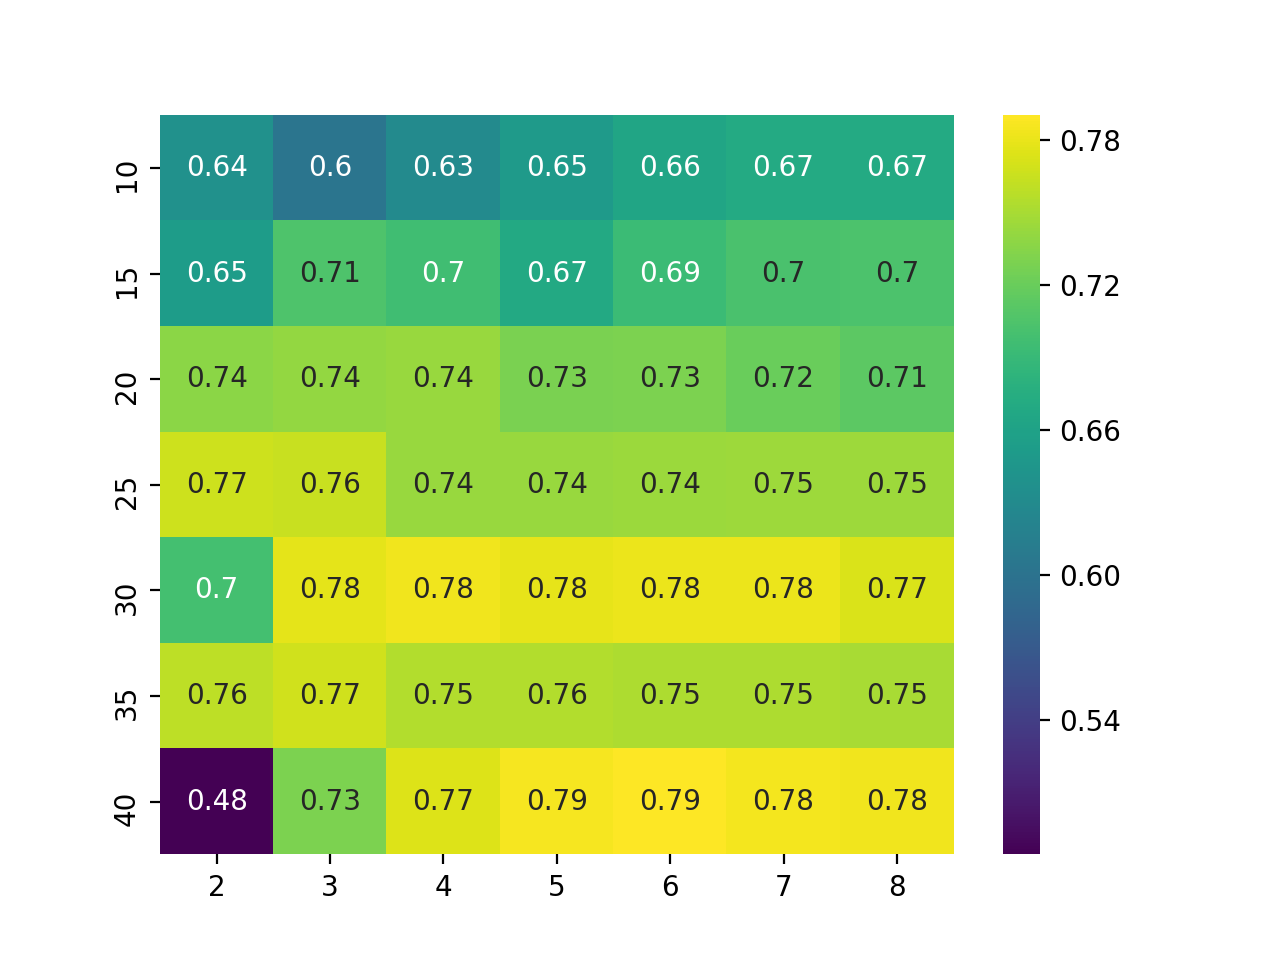

In [87]:
# Create heatmap that matches the table of graphs
import pandas as pd
import seaborn as sns

ser = pd.Series(list(Qfeds.values()),
                  index=pd.MultiIndex.from_tuples(Qfeds.keys()))
df = ser.unstack().fillna(0)
plt.close('all')
sns.heatmap(df, annot=True, cmap='viridis')

<IPython.core.display.Javascript object>


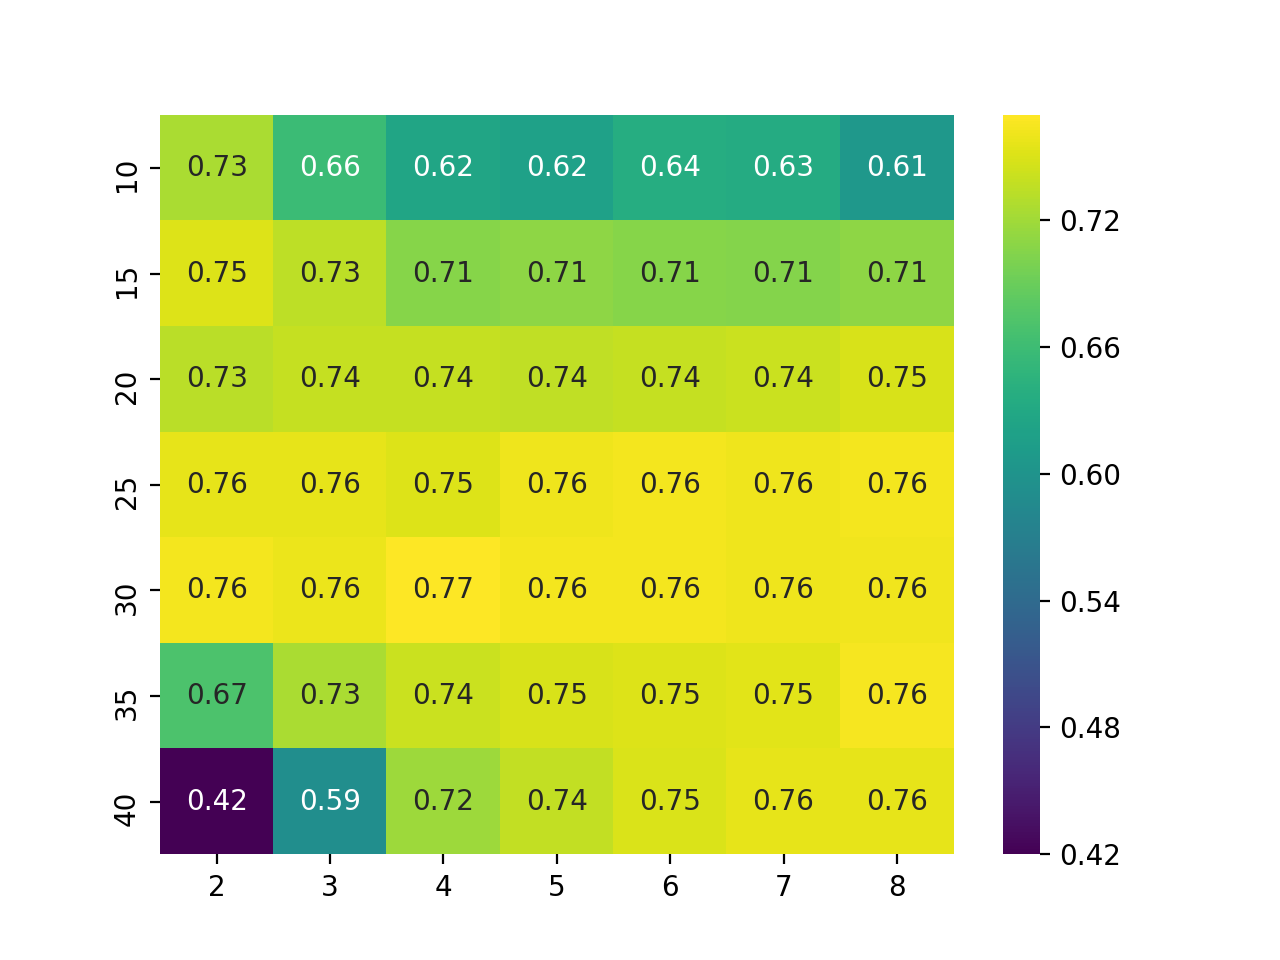

In [86]:
ser = pd.Series(list(Qfasts.values()),
                  index=pd.MultiIndex.from_tuples(Qfasts.keys()))
df = ser.unstack().fillna(0)
plt.close('all')
sns.heatmap(df, annot=True, cmap='viridis')

### Calculate network measures for each RSN, in each condition

#### Modularity

In [141]:
Qfed = get_mod(dGfed.G_)
Qfast = get_mod(dGfast.G_)
print('Fed graph: Q = %.3f' % Qfed)
print('Fast graph: Q = %.3f' % Qfast)

Fed graph: Q = 0.766
Fast graph: Q = 0.709


In [142]:
# What is the optimal community structure?
partition2 = community.best_partition(dGfed.G_)
size = len(set(partition2.values()))
Qfed = community.modularity(partition2,dGfed.G_)
print('Fed optimal: Q = %.3f' % Qfed)
print('Number of communities: %d' % size)

partition2 = community.best_partition(dGfast.G_)
size = len(set(partition2.values()))
Qfast = community.modularity(partition2,dGfast.G_)
print('Fast optimal: Q = %.3f' % Qfast)
print('Number of communities: %d' % size)

Fed optimal: Q = 0.846
Number of communities: 22
Fast optimal: Q = 0.846
Number of communities: 18


#### Within-module degree

In [5]:
import collections

def within_module_degree(G, normalize = False):
    # Get community partition
    _,partition = get_mod(G,return_partition=True)
    # If we want to normalize by community size
    if normalize:
        # Get size of each RSN community
        nodecount = collections.Counter(partition.values())
    inmod_deg = collections.defaultdict(list)
    # Loop through nodes, calculate degree within module, append to list by RSN
    for node in G.nodes():
        # Get neighbors of node and only count the ones that are in same RSN
        wmod = len([1 for nbr in G[node] if partition[nbr] == partition[node]])
        if normalize:
            # Normalize by community size
            wmod /= float(nodecount[partition[node]])
        inmod_deg[partition[node]].append(wmod)

    return inmod_deg # This is a dictionary keyed by RSN, values are lists of within module degree of every node in RSN

In [6]:
from matplotlib import cm

def plot_network_measure(network_measure1,network_measure2,y_axlabel,plot_title,y_lim):
    """
    Take a dictionary keyed by RSN, values are lists of a network measure value for every node in RSN
    Plot bars comparing fed and fasted states for each RSN
    """

    # Bar plot for fed - this is a list of tuples (RSN,mean,std)
    bars_fed = [(np.mean(network_measure1[rsn]),np.std(network_measure1[rsn])) for rsn in sorted(network_measure1.keys())]
    barh_fed,barerr_fed = list(zip(*bars_fed))

    # Bar plot for fast - this is a list of tuples (RSN,mean,std)
    bars_fast = [(np.mean(network_measure2[rsn]),np.std(network_measure2[rsn])) for rsn in sorted(network_measure2.keys())]
    barh_fast,barerr_fast = list(zip(*bars_fast))

    cmap = cm.get_cmap('viridis', 20)
    colors = cmap(np.linspace(0,1,10))

    index = np.arange(len(bars_fed))
    bar_width = 0.35
    error_config = {'ecolor': '0.3'}

    plt.close('all')
    fig, ax = plt.subplots(figsize=(12,4))

    rects1 = ax.bar(index, barh_fed, bar_width,
                    color=colors[2],
                    yerr=barerr_fed, error_kw=error_config,
                    label='Fed')
    rects2 = ax.bar(index + bar_width, barh_fast, bar_width,
                    color=colors[7],
                    yerr=barerr_fast, error_kw=error_config,
                    label='Fasted')

    ax.set_ylabel(y_axlabel)
    ax.set_title(plot_title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(majorRSNs,fontsize=7)
    ax.set_ylim([0,y_lim])
    ax.legend()

    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


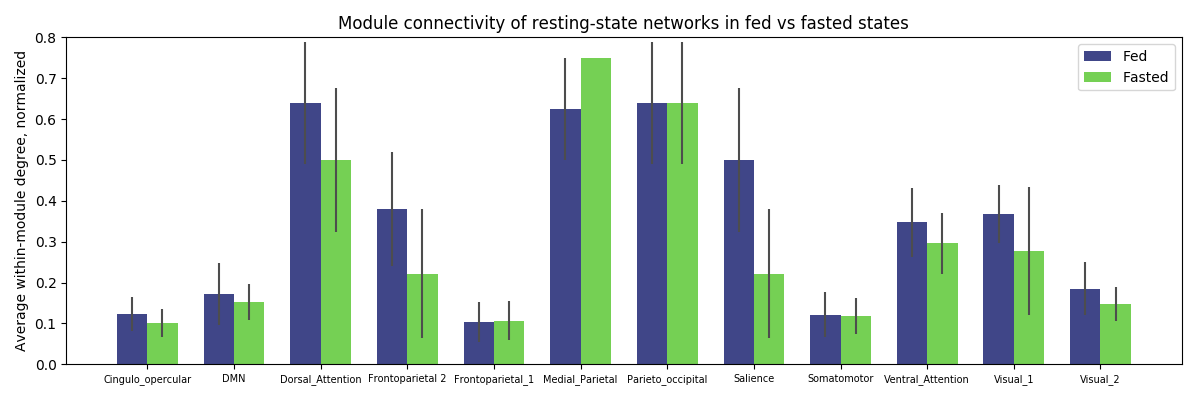

In [194]:
inmod_fed = within_module_degree(dGfed.G_, normalize=True)
inmod_fast = within_module_degree(dGfast.G_, normalize=True)

plot_network_measure(inmod_fed,inmod_fast,
                     'Average within-module degree, normalized',
                     'Module connectivity of resting-state networks in fed vs fasted states',
                     0.8
                    )

#### Betweenness centrality

In [7]:
import collections

def betweenness(G):
    # Get community partition
    _,partition = get_mod(G,return_partition=True)
    BC = nx.betweenness_centrality(G)
    btw = collections.defaultdict(list)
    # Loop through nodes with betweenness calculated, and append to appropriate RSN
    for node in BC:
        btw[partition[node]].append(BC[node])

    return btw # This is a dictionary keyed by RSN, values are lists of betweenness of every node in RSN

<IPython.core.display.Javascript object>


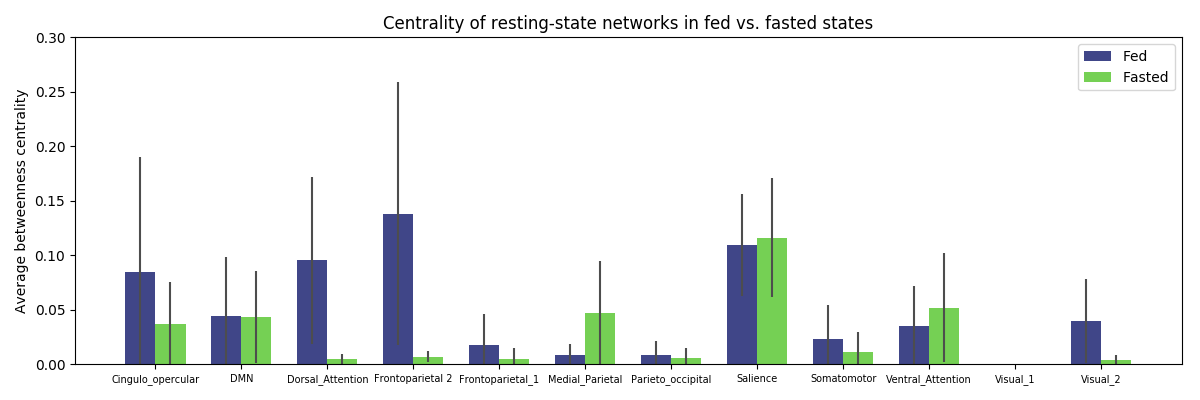

In [195]:
btw_fed = betweenness(dGfed.G_)
btw_fast = betweenness(dGfast.G_)

plot_network_measure(btw_fed,btw_fast,
                     'Average betweenness centrality',
                     'Centrality of resting-state networks in fed vs. fasted states',
                     0.3
                    )

#### Participation coefficient

In [8]:
from bct import participation_coef

def calc_particip(G):
    # Pull out the binary undirected adjacency matrix
    A = nx.to_numpy_array(G)
    # Get community affiliation vector
    _,partition = get_mod(G,return_partition=True)
    C = [np.where(majorRSNs == partition[node]) for node in G.nodes()] # Return a number corresponding to an RSN community
    # Calculate participation coefficient for each node
    P = participation_coef(A,C)
    # Create a dictionary keyed by RSN, values are lists of particip coef of every node in RSN
    particip = collections.defaultdict(list)
    for ind,p in enumerate(P):
        particip[partition[list(G.nodes())[ind]]].append(p)
        
    return particip

<IPython.core.display.Javascript object>


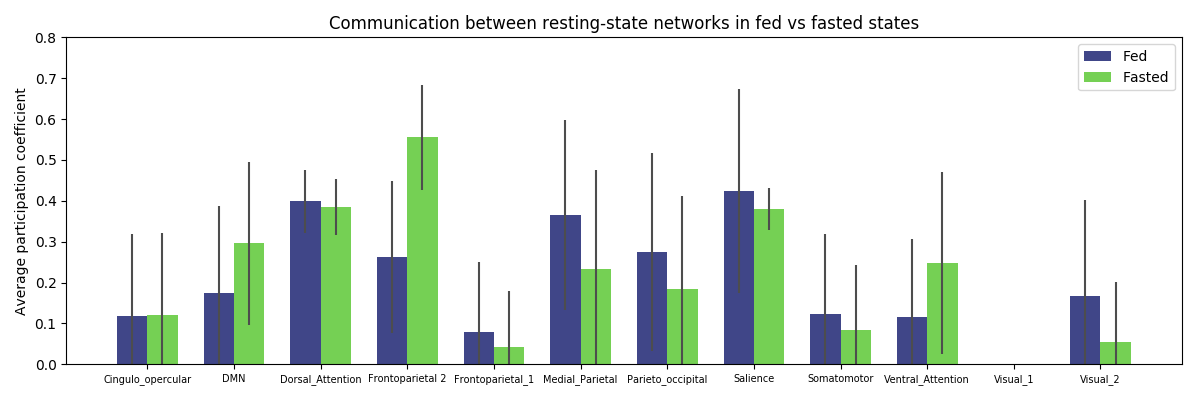

In [196]:
p_fed = calc_particip(dGfed.G_)
p_fast = calc_particip(dGfast.G_)

plot_network_measure(p_fed,p_fast,
                     'Average participation coefficient',
                     'Communication between resting-state networks in fed vs fasted states',
                     0.8
                    )

#### ROI x ROI matrix

In [9]:
def rsn_index_change(sorted_rsns):
    """
    Process sorted array of network labels, return an array of indexes where the label changes
    """
    index_array = []
    current_label = 'batman'
    for ind,label in enumerate(sorted_rsns):
        if label != current_label:
            current_label = label
            index_array.append(ind)
    # Add ending index
    index_array.append(len(sorted_rsns) - 1)
    return index_array

In [11]:
from matplotlib import patches

def add_rsn_patches(ax, lenx, leny, boundaries, color_array, alpha_param = 1.0, offset = 1.0):
    """
    Plots rectangular patches vertically and horizontally for each network bounded by the indices
    provided using the colors provided
    """
    # Loop through boundaries
    for num,ind in enumerate(boundaries[:-1]):
        nextind = boundaries[num+1]
        hrect = patches.Rectangle((ind,ind), nextind-ind, nextind-ind,linewidth=1.5,edgecolor=color_array[num],facecolor='none',alpha=alpha_param)
        ax.add_patch(hrect)
        vrect = patches.Rectangle((ind,ind), nextind-ind, nextind-ind,linewidth=1.5,edgecolor=color_array[num],facecolor='none',alpha=alpha_param)
        ax.add_patch(vrect)

In [12]:
from matplotlib import cm

def plot_network_adj(TCM):
    
    rsnidx = np.argsort(roi2rsn_clean)
    A = TCM[rsnidx,:]
    A = A[:,rsnidx]
    rect_inds = rsn_index_change(roi2rsn_clean[rsnidx])

    plt.close('all')
    plt.imshow(A,cmap='binary_r')
    ax = plt.gca()
    cmap = cm.get_cmap('tab20', 20)
    colors = cmap(np.linspace(0,1,20))

    add_rsn_patches(ax,A.shape[1],A.shape[0],rect_inds,colors[:len(majorRSNs)],alpha_param=1.0,offset=2)

    plt.show()

<IPython.core.display.Javascript object>


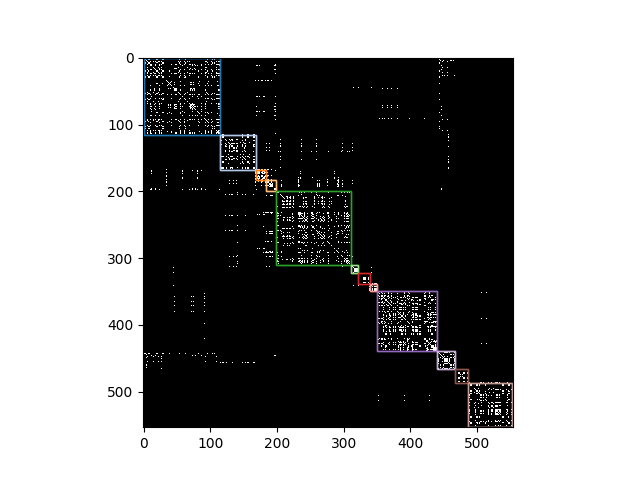

In [120]:
plot_network_adj(dGfed.tcm_)

<IPython.core.display.Javascript object>


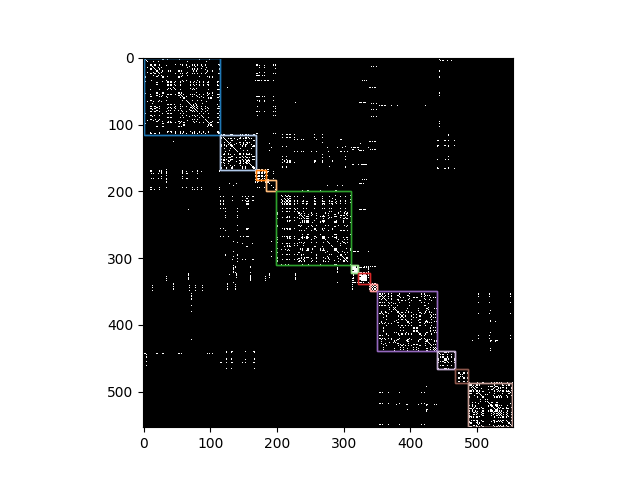

In [121]:
plot_network_adj(dGfast.tcm_)

In [28]:
plot_network_adj(dGfed.tcm_ - dGfast.tcm_)

NameError: name 'dGfed' is not defined

### Run all network measure calculations on every session individually

Everything below this cell is important, and they use all the functions above.

In [13]:
# Loop through all sessions and get a FC
sessions = load_scrubbed(n_sessions=-1, merge=False,
                         apply_tmask=True,apply_rmask=True,
                         rmask_kwds=dict(n=12,minor=False),zscore=False)

INFO:load_data:load_scrubbed(**{'n_sessions': -1, 'merge': False, 'apply_tmask': True, 'apply_rmask': True, 'rmask_kwds': {'n': 12, 'minor': False}, 'zscore': False})
INFO:load_data:Loading data...
INFO:root:  [+] session: 0, file: sub014.txt
INFO:root:      keeping: 505 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 1, file: sub015.txt
INFO:root:      keeping: 508 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 2, file: sub016.txt
INFO:root:      keeping: 508 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 3, file: sub017.txt
INFO:root:      keeping: 504 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 4, file: sub018.txt
INFO:root:      keeping: 508 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 5, file: sub019.txt
INFO:root:      keeping: 513 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 6, file: sub020

INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 63, file: sub082.txt
INFO:root:      keeping: 502 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 64, file: sub083.txt
INFO:root:      keeping: 482 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 65, file: sub084.txt
INFO:root:      keeping: 515 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 66, file: sub085.txt
INFO:root:      keeping: 518 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 67, file: sub086.txt
INFO:root:      keeping: 515 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 68, file: sub087.txt
INFO:root:      keeping: 516 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 69, file: sub088.txt
INFO:root:      keeping: 516 (time points)
INFO:root:      keeping: 554 (regions)
INFO:root:  [+] session: 70, file: sub089.txt
INFO:root:      kee

In [14]:
# List of dictionaries for each session each keyed by RSN, and values are lists with a value for every node
btw_fed = []
btw_fast = []
wmod_fed = []
wmod_fast = []
Qfed = []
Qfast = []
p_fed = []
p_fast = []

# List of matrices
Afed = []
Afast = []

bestres = 20
bestgain = 8.
overlap = (bestgain - 1) / bestgain

for sess_num,session in enumerate(sessions):
    day = int(session.meta['day_of_week'][0])
    if day != 4 and day != 2: continue
    print('Processing session %d...' % (sess_num+1))
    # Zscore data
    Xz = scipy.stats.zscore(session.X,axis=0)
    # Run Mapper/DyNeuSR
    results = run_mapper(Xz.T,df_roi_rsn,cover=km.Cover(bestres,overlap))
    G = results['dG'].G_
    if day == 2: # Fasted
        btw_fast.append(betweenness(G))
        wmod_fast.append(within_module_degree(G,normalize=True))
        Qfast.append(get_mod(G))
        Afast.append(results['dG'].tcm_)
        p_fast.append(calc_particip(G))
        results['dG'].visualize(path_html='results/fasted%d_spatial.html' % (sess_num+1), show=False, reset=True, static=False, PORT=8800)
    elif day == 4: # Fed
        btw_fed.append(betweenness(G))
        wmod_fed.append(within_module_degree(G,normalize=True))
        Qfed.append(get_mod(G))
        Afed.append(results['dG'].tcm_)
        p_fed.append(calc_particip(G))
        results['dG'].visualize(path_html='results/fed%d_spatial.html' % (sess_num+1), show=False, reset=True, static=False, PORT=8800)

Processing session 1...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed1_spatial.html
Processing session 3...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted3_spatial.html
Processing session 4...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed4_spatial.html
Processing session 6...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted6_spatial.html
Processing session 7...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed7_spatial.html
Processing session 9...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted9_spatial.html
Processing session 10...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed10_spatial.html
Processing session 12...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted12_spatial.html
Processing session 13...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted13_spatial.html
Processing session 15...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted15_spatial.html
Processing session 16...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed16_spatial.html
Processing session 18...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed18_spatial.html
Processing session 19...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed19_spatial.html
Processing session 21...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted21_spatial.html
Processing session 22...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed22_spatial.html
Processing session 23...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted23_spatial.html
Processing session 24...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed24_spatial.html
Processing session 26...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted26_spatial.html
Processing session 27...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed27_spatial.html
Processing session 29...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted29_spatial.html
Processing session 31...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted31_spatial.html
Processing session 32...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed32_spatial.html
Processing session 34...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted34_spatial.html
Processing session 35...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed35_spatial.html
Processing session 37...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted37_spatial.html
Processing session 38...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted38_spatial.html
Processing session 40...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted40_spatial.html
Processing session 41...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed41_spatial.html
Processing session 42...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted42_spatial.html
Processing session 43...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed43_spatial.html
Processing session 44...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted44_spatial.html
Processing session 45...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed45_spatial.html
Processing session 46...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted46_spatial.html
Processing session 47...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted47_spatial.html
Processing session 48...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed48_spatial.html
Processing session 49...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted49_spatial.html
Processing session 50...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted50_spatial.html
Processing session 51...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted51_spatial.html
Processing session 52...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted52_spatial.html
Processing session 53...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed53_spatial.html
Processing session 54...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted54_spatial.html
Processing session 55...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed55_spatial.html
Processing session 56...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted56_spatial.html
Processing session 57...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed57_spatial.html
Processing session 58...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted58_spatial.html
Processing session 59...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed59_spatial.html
Processing session 60...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted60_spatial.html
Processing session 61...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted61_spatial.html
Processing session 62...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed62_spatial.html
Processing session 63...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted63_spatial.html
Processing session 64...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed64_spatial.html
Processing session 65...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted65_spatial.html
Processing session 66...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed66_spatial.html
Processing session 67...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted67_spatial.html
Processing session 68...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted68_spatial.html
Processing session 69...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed69_spatial.html
Processing session 70...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted70_spatial.html
Processing session 71...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed71_spatial.html
Processing session 72...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fasted72_spatial.html
Processing session 73...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed73_spatial.html
Processing session 74...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted74_spatial.html
Processing session 75...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted75_spatial.html
Processing session 76...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed76_spatial.html
Processing session 77...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted77_spatial.html
Processing session 78...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed78_spatial.html
Processing session 79...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted79_spatial.html
Processing session 80...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed80_spatial.html
Processing session 81...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted81_spatial.html
Processing session 82...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


[Force Graph] http://localhost:8800/results/fed82_spatial.html
Processing session 83...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fed83_spatial.html
Processing session 84...


label,group,value,row_count
Cingulo_opercular,0,115,553
DMN,1,52,553
Dorsal_Attention,2,15,553
Frontoparietal 2,3,16,553
Frontoparietal_1,4,112,553
Medial_Parietal,5,11,553
Parieto_occipital,6,17,553
Salience,7,11,553
Somatomotor,8,90,553
Ventral_Attention,9,27,553


[Force Graph] http://localhost:8800/results/fasted84_spatial.html


/Users/rafi/Documents/Stanford/Saggar_Lab/bctpy/bct/algorithms/centrality.py:738: RuntimeWarning: invalid value encountered in true_divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


#### ROI x ROI matrix

<IPython.core.display.Javascript object>


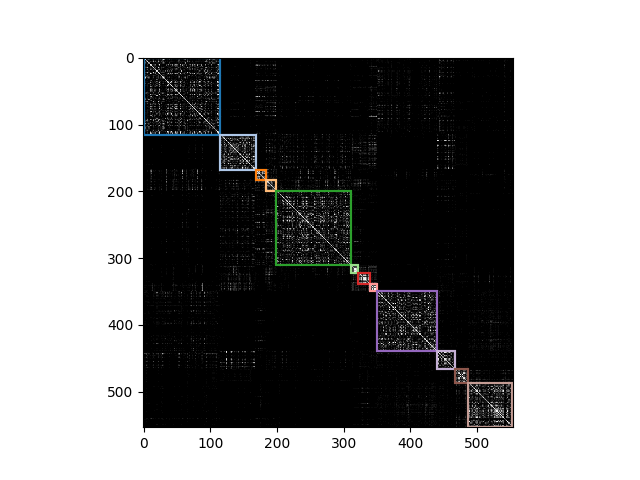

In [15]:
Afed_mean = np.mean(Afed,axis=0)
plot_network_adj(Afed_mean)

<IPython.core.display.Javascript object>


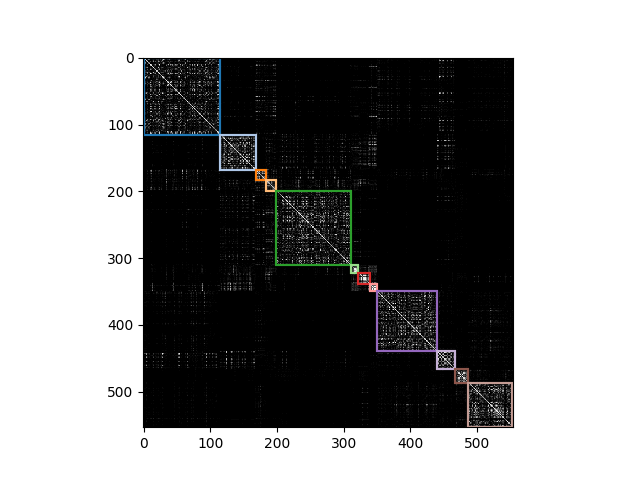

In [16]:
Afast_mean = np.mean(Afast,axis=0)
plot_network_adj(Afast_mean)

Does this match the FC matrix?

<IPython.core.display.Javascript object>


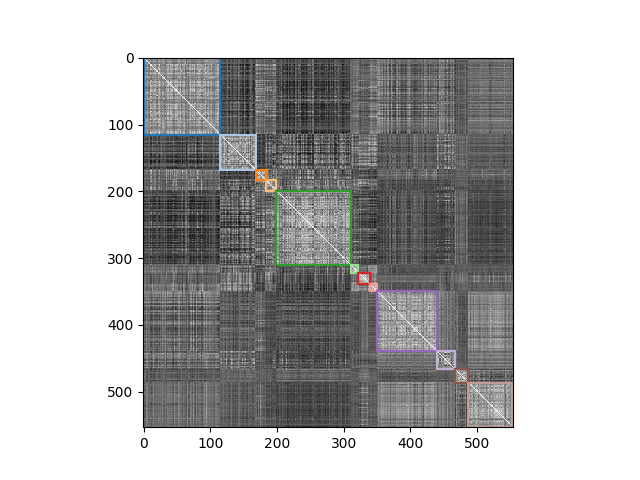

In [17]:
fc = [np.corrcoef(session.X.T) for session in sessions]
fcmean = np.mean(fc,axis=0)
plot_network_adj(fcmean)

#### Modularity

<IPython.core.display.Javascript object>


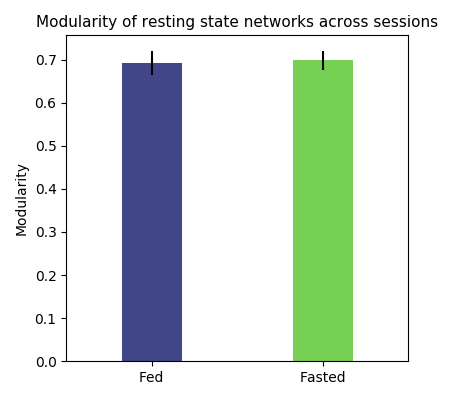

In [18]:
Qfed_mean = np.mean(Qfed)
Qfed_std = np.std(Qfed)
Qfast_mean = np.mean(Qfast)
Qfast_std = np.std(Qfast)

barlabels = ['Fed','Fasted']
barh = [Qfed_mean,Qfast_mean]
barerr = [Qfed_std,Qfast_std]
bar_width = 0.35
cmap = cm.get_cmap('viridis', 20)
colors = cmap(np.linspace(0,1,10))

plt.close('all')
plt.figure(figsize=(4.5,4))
plt.bar(range(len(barlabels)),barh,bar_width,yerr=barerr,color=[colors[2],colors[7]])
plt.xticks(range(len(barlabels)), barlabels, fontsize=10)
plt.ylabel('Modularity')
plt.title('Modularity of resting state networks across sessions', fontsize=11)
plt.xlim([-0.5,1.5])
fig = plt.gcf()
fig.tight_layout()
plt.show()

#### Within module degree

<IPython.core.display.Javascript object>


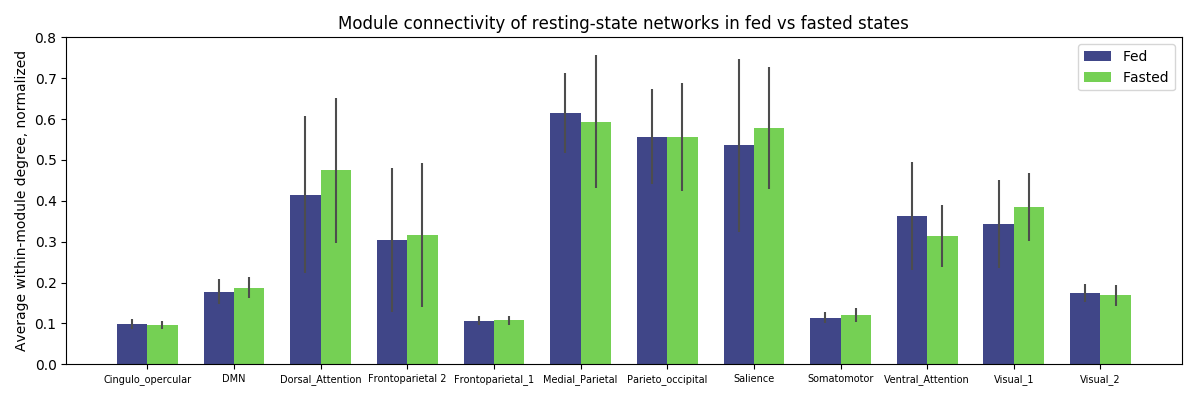

In [19]:
rsnstats_fed = collections.defaultdict(list)
for session in wmod_fed:
    for rsn in session:
        rsnstats_fed[rsn].append(np.mean(session[rsn]))

rsnstats_fast = collections.defaultdict(list)
for session in wmod_fast:
    for rsn in session:
        rsnstats_fast[rsn].append(np.mean(session[rsn]))
        
plot_network_measure(rsnstats_fed,rsnstats_fast,
                     'Average within-module degree, normalized',
                     'Module connectivity of resting-state networks in fed vs fasted states',
                     0.8
                    )

#### Betweenness centrality

<IPython.core.display.Javascript object>


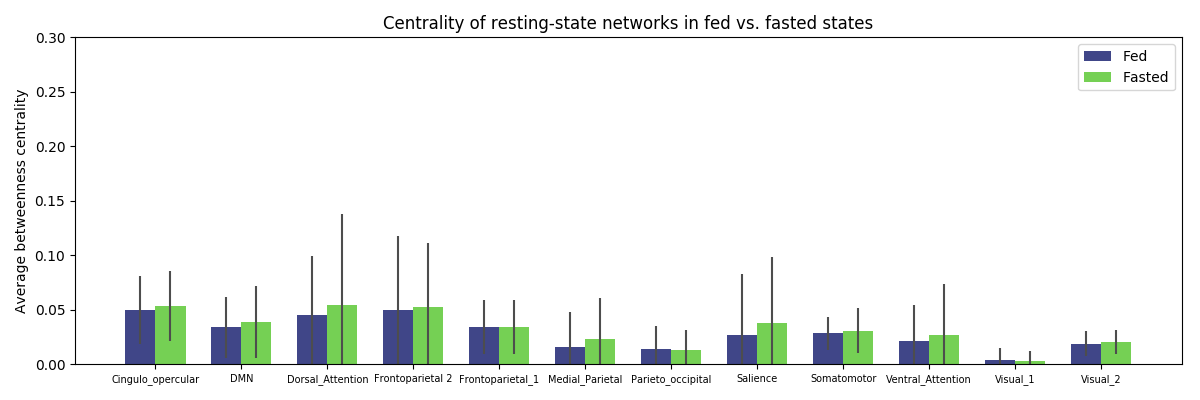

In [21]:
rsnstats_fed = collections.defaultdict(list)
for session in btw_fed:
    for rsn in session:
        rsnstats_fed[rsn].append(np.mean(session[rsn]))
        
rsnstats_fast = collections.defaultdict(list)
for session in btw_fast:
    for rsn in session:
        rsnstats_fast[rsn].append(np.mean(session[rsn]))
        
plot_network_measure(rsnstats_fed,rsnstats_fast,
                     'Average betweenness centrality',
                     'Centrality of resting-state networks in fed vs. fasted states',
                     0.3
                    )

#### Participation Coefficient

<IPython.core.display.Javascript object>


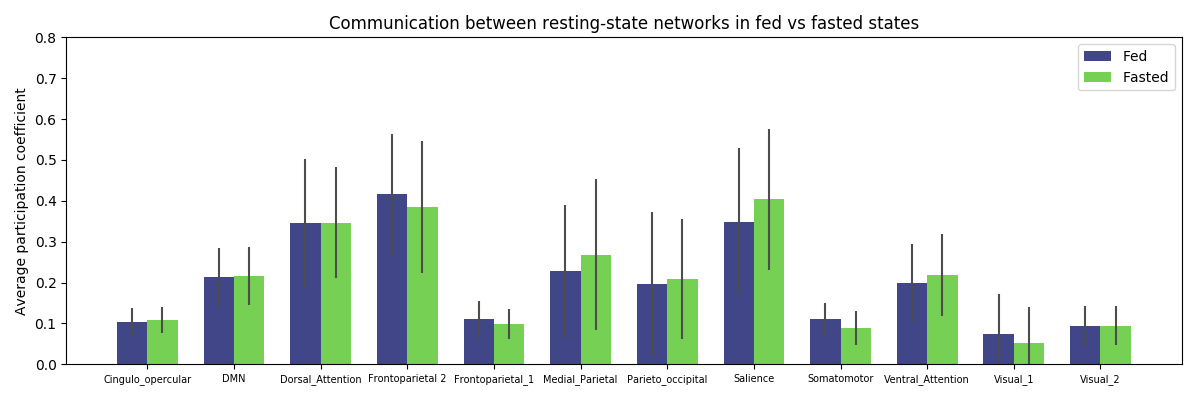

In [22]:
rsnstats_fed = collections.defaultdict(list)
for session in p_fed:
    for rsn in session:
        rsnstats_fed[rsn].append(np.mean(session[rsn]))
        
rsnstats_fast = collections.defaultdict(list)
for session in p_fast:
    for rsn in session:
        rsnstats_fast[rsn].append(np.mean(session[rsn]))
        
plot_network_measure(rsnstats_fed,rsnstats_fast,
                     'Average participation coefficient',
                     'Communication between resting-state networks in fed vs fasted states',
                     0.8
                    )